<a href="https://colab.research.google.com/github/Meet200/Machine_Learning-/blob/main/Multiple_varible_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd /content/drive/"My Drive/Colab Notebooks/Linear regression"

/content/drive/My Drive/Colab Notebooks/Linear regression


In [5]:
#column name = ['x','y']
columnname = ['area','bedroom','price']
dataset = pd.read_csv("ex1data2.txt",names=columnname)
print(dataset)

    area  bedroom   price
0   2104        3  399900
1   1600        3  329900
2   2400        3  369000
3   1416        2  232000
4   3000        4  539900
5   1985        4  299900
6   1534        3  314900
7   1427        3  198999
8   1380        3  212000
9   1494        3  242500
10  1940        4  239999
11  2000        3  347000
12  1890        3  329999
13  4478        5  699900
14  1268        3  259900
15  2300        4  449900
16  1320        2  299900
17  1236        3  199900
18  2609        4  499998
19  3031        4  599000
20  1767        3  252900
21  1888        2  255000
22  1604        3  242900
23  1962        4  259900
24  3890        3  573900
25  1100        3  249900
26  1458        3  464500
27  2526        3  469000
28  2200        3  475000
29  2637        3  299900
30  1839        2  349900
31  1000        1  169900
32  2040        4  314900
33  3137        3  579900
34  1811        4  285900
35  1437        3  249900
36  1239        3  229900
37  2132    

In [6]:
dataset.shape

(47, 3)

In [7]:
dataset.describe()

,area,bedroom,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [8]:
area_value = dataset.iloc[0:dataset.shape[0],0:1]
bedroom_value = dataset.iloc[0:dataset.shape[0],1:2]
price_value = dataset.iloc[0:dataset.shape[0],2:3]

In [ ]:
area_value

,area
0,2104
1,1600
2,2400
3,1416
4,3000
5,1985
6,1534
7,1427
8,1380
9,1494


In [9]:
bedroom_value

,bedroom
0,3
1,3
2,3
3,2
4,4
5,4
6,3
7,3
8,3
9,3


In [10]:
price_value

,price
0,399900
1,329900
2,369000
3,232000
4,539900
5,299900
6,314900
7,198999
8,212000
9,242500


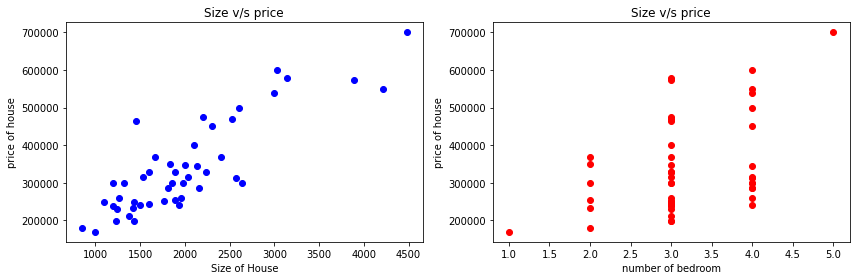

In [11]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(figsize=(12,4),nrows=1,ncols=2)
axes[0].scatter(area_value,price_value,color='b')
axes[0].set_xlabel("Size of House")
axes[0].set_ylabel("price of house")
axes[0].set_title("Size v/s price")

axes[1].scatter(bedroom_value,price_value,color='r')
axes[1].set_xlabel("number of bedroom")
axes[1].set_ylabel("price of house")
axes[1].set_title("Size v/s price")
plt.tight_layout()

In [39]:
#feature Normalization
def feature_normalization(X):
    mean = np.mean(X,axis=0)
    std = np.std(X,axis=0)
    X_norm = (X-mean)/std

    return X_norm,mean,std
    


In [40]:
type(dataset)

pandas.core.frame.DataFrame

In [41]:
data = dataset.values       #dataFrames to array
n = len(data[:,-1])
X=data[:,0:2].reshape(n,2)
X_norm,mean,std = feature_normalization(X)


In [42]:
Y=data[:,-1].reshape(n,1)

In [43]:
theta_array = np.zeros((3,1))

In [44]:
#defining the Hypothesis    : H(x) = theta0 + theta1*x1 + theta2*x2

def hypothesis(theta_array,x1,x2):      #theta_array = [theta_array[0],theta_array[1],theta_array[2]]
    return theta_array[0]+(theta_array[1]*x1)+(theta_array[2]*x2)

In [45]:
def cost_function(theta_array,x1,x2,y,m):   #x and y are list of observation.
    total_error = 0     #accumulate all the error
    for i in range(m):
        total_error+=(theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i] - y[i])**2

    return total_error/(2*m)

In [46]:
def gradient_descent(theta_array,x1,x2,y,alpha,m):
    summation_theta0 = 0
    summation_theta1 = 0
    summation_theta2 = 0

    for i in range(m):
        summation_theta0+=((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]) - y[i])
        summation_theta1+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]) - y[i])*x1[i])
        summation_theta1+=(((theta_array[0]+theta_array[1]*x1[i]+theta_array[2]*x2[i]) - y[i])*x2[i])

    new_theta0 = theta_array[0]-alpha*(summation_theta0/m)
    new_theta1 = theta_array[1]-alpha*(summation_theta1/m)
    new_theta2 = theta_array[2]-alpha*(summation_theta2/m)

    updated_theta_array = [new_theta0,new_theta1,new_theta2]
    print(updated_theta_array)
    return updated_theta_array

In [47]:
def training(x1,x2,y,alpha,iters):
    theta_0 = 0
    theta_1 = 0
    theta_2 = 0
    theta_array = [theta_0,theta_1,theta_2]

    m=x1.size                #size of the data set or the number of observation
    cost_function_values = []
    for i in range(iters):
        theta_array = gradient_descent(theta_array,x1,x2,y,alpha,m)     #taking the new theta's
        cost_function_values.append(cost_function(theta_array,x1,x2,y,m))   #taking all the cost function values and storing
        if(i%6==0):
            y_new=x2*theta_array[2]+x1*theta_array[1]+theta_array[0]       #linear regression line
            plt.plot(x1,y_new,'r')
            plt.scatter(x1,y)
            plt.show()

    x=np.arange(0,len(cost_function_values),step=1)
    plt.plot(x,cost_function_values,"-b")
    plt.xlabel("number of iteration")
    plt.ylabel("Cost/loss values")
    plt.title("cost Function curve")
    plt.show()

    return theta_array

[array([3404.12659574]), array([1604.72955249]), 0.0]


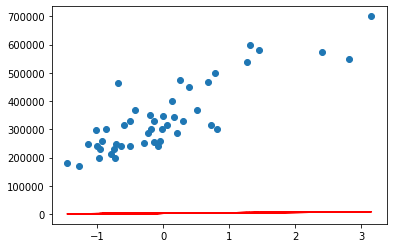

[array([6774.21192553]), array([3184.42585024]), 0.0]
[array([10110.59640202]), array([4739.47940381]), 0.0]
[array([13413.61703375]), array([6270.27463194]), 0.0]
[array([16683.60745915]), array([7777.18995655]), 0.0]
[array([19920.89798031]), array([9260.5978963]), 0.0]
[array([23125.81559625]), array([10720.86515868]), 0.0]


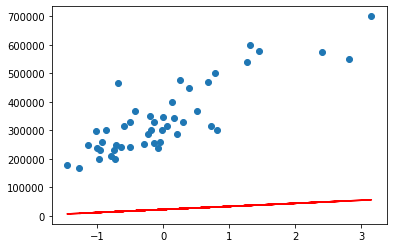

[array([26298.68403603]), array([12158.35273067]), 0.0]
[array([29439.82379141]), array([13573.41596797]), 0.0]
[array([32549.55214924]), array([14966.40468284]), 0.0]
[array([35628.1832235]), array([16337.66323061]), 0.0]
[array([38676.02798701]), array([17687.53059474]), 0.0]
[array([41693.39430288]), array([19016.3404707]), 0.0]


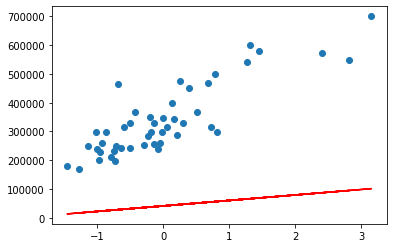

[array([44680.5869556]), array([20324.42134838]), 0.0]
[array([47637.90768179]), array([21612.09659336]), 0.0]
[array([50565.65520071]), array([22879.68452682]), 0.0]
[array([53464.12524445]), array([24127.49850423]), 0.0]
[array([56333.61058775]), array([25355.84699282]), 0.0]
[array([59174.40107762]), array([26565.03364784]), 0.0]


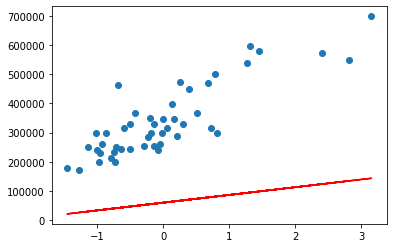

[array([61986.78366259]), array([27755.3573876]), 0.0]
[array([64771.04242171]), array([28927.11246739]), 0.0]
[array([67527.45859323]), array([30080.58855223]), 0.0]
[array([70256.31060305]), array([31216.07078843]), 0.0]
[array([72957.87409276]), array([32333.83987413]), 0.0]
[array([75632.42194758]), array([33434.17212868]), 0.0]


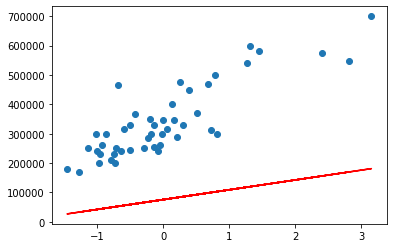

[array([78280.22432385]), array([34517.33956092]), 0.0]
[array([80901.54867635]), array([35583.60993644]), 0.0]
[array([83496.65978533]), array([36633.2468438]), 0.0]
[array([86065.81978322]), array([37666.50975964]), 0.0]
[array([88609.28818114]), array([38683.65411286]), 0.0]
[array([91127.32189507]), array([39684.93134775]), 0.0]


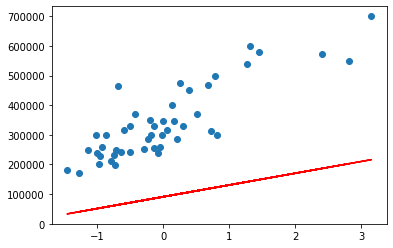

[array([93620.17527186]), array([40670.58898614]), 0.0]
[array([96088.10011489]), array([41640.87068864]), 0.0]
[array([98531.34570949]), array([42596.01631478]), 0.0]
[array([100950.15884814]), array([43536.2619824]), 0.0]
[array([103344.7838554]), array([44461.84012597]), 0.0]
[array([105715.46261259]), array([45372.97955404]), 0.0]


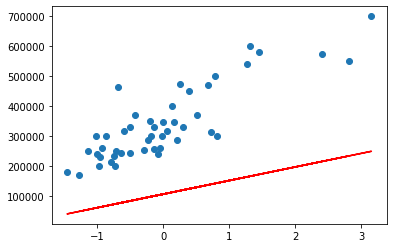

[array([108062.43458221]), array([46269.90550586]), 0.0]
[array([110385.93683213]), array([47152.83970698]), 0.0]
[array([112686.20405955]), array([48022.00042412]), 0.0]
[array([114963.4686147]), array([48877.60251912]), 0.0]
[array([117217.9605243]), array([49719.85750204]), 0.0]
[array([119449.9075148]), array([50548.97358346]), 0.0]


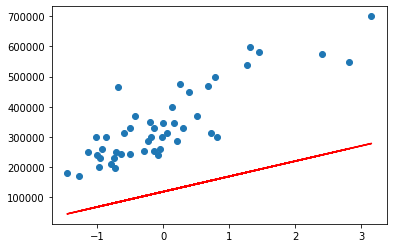

[array([121659.5350354]), array([51365.15572591]), 0.0]
[array([123847.06628079]), array([52168.60569462]), 0.0]
[array([126012.72221373]), array([52959.52210731]), 0.0]
[array([128156.72158733]), array([53738.10048335]), 0.0]
[array([130279.28096721]), array([54504.53329206]), 0.0]
[array([132380.61475328]), array([55259.01000031]), 0.0]


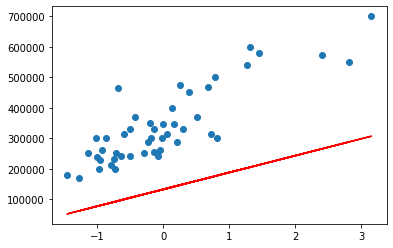

[array([134460.93520149]), array([56001.71711935]), 0.0]
[array([136520.45244522]), array([56732.83825091]), 0.0]
[array([138559.37451651]), array([57452.55413259]), 0.0]
[array([140577.90736709]), array([58161.04268256]), 0.0]
[array([142576.25488917]), array([58858.4790435]), 0.0]
[array([144554.61893602]), array([59545.03562593]), 0.0]


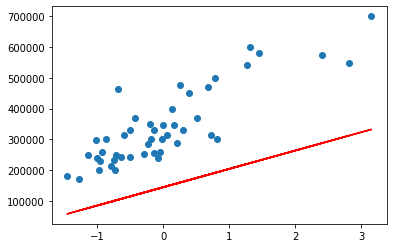

[array([146513.1993424]), array([60220.88215084]), 0.0]
[array([148452.19394472]), array([60886.18569162]), 0.0]
[array([150371.79860102]), array([61541.11071534]), 0.0]
[array([152272.20721076]), array([62185.81912348]), 0.0]
[array([154153.61173439]), array([62820.47029189]), 0.0]
[array([156016.20221279]), array([63445.22111022]), 0.0]


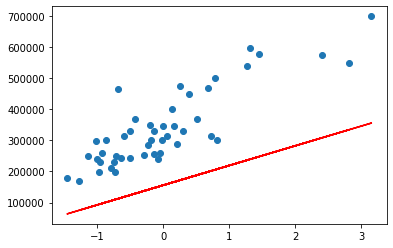

[array([157860.16678641]), array([64060.22602067]), 0.0]
[array([159685.69171429]), array([64665.6370562]), 0.0]
[array([161492.96139289]), array([65261.60387814]), 0.0]
[array([163282.15837471]), array([65848.2738131]), 0.0]
[array([165053.46338671]), array([66425.79188948]), 0.0]
[array([166807.05534858]), array([66994.30087327]), 0.0]


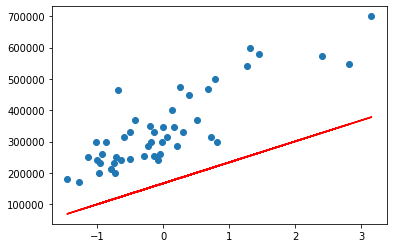

[array([168543.11139084]), array([67553.94130336]), 0.0]
[array([170261.80687268]), array([68104.85152628]), 0.0]
[array([171963.3153997]), array([68647.16773039]), 0.0]
[array([173647.80884144]), array([69181.02397958]), 0.0]
[array([175315.45734877]), array([69706.55224636]), 0.0]
[array([176966.42937103]), array([70223.88244453]), 0.0]


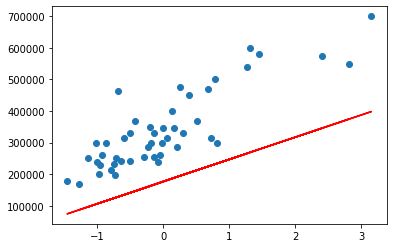

[array([178600.89167307]), array([70733.14246127]), 0.0]
[array([180219.00935208]), array([71234.45818876]), 0.0]
[array([181820.9458543]), array([71727.95355531]), 0.0]
[array([183406.86299151]), array([72213.750556]), 0.0]
[array([184976.92095734]), array([72691.96928279]), 0.0]
[array([186531.27834351]), array([73162.72795427]), 0.0]


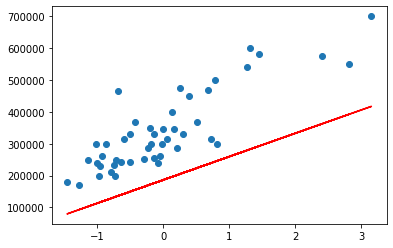

[array([188070.09215582]), array([73626.14294488]), 0.0]
[array([189593.51783]), array([74082.3288136]), 0.0]
[array([191101.70924745]), array([74531.39833239]), 0.0]
[array([192594.81875072]), array([74973.46251396]), 0.0]
[array([194072.99715895]), array([75408.63063927]), 0.0]
[array([195536.39378311]), array([75837.01028454]), 0.0]


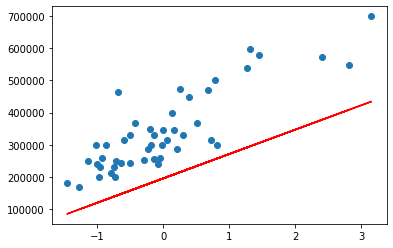

[array([196985.15644102]), array([76258.70734784]), 0.0]
[array([198419.43147236]), array([76673.82607525]), 0.0]
[array([199839.36375338]), array([77082.46908665]), 0.0]
[array([201245.09671159]), array([77484.73740109]), 0.0]
[array([202636.77234022]), array([77880.73046176]), 0.0]
[array([204014.53121256]), array([78270.54616054]), 0.0]


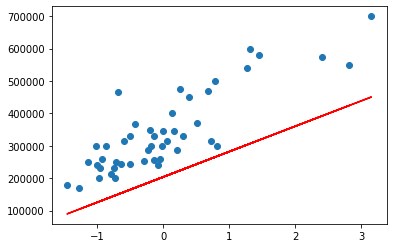

[array([205378.51249618]), array([78654.28086227]), 0.0]
[array([206728.85396696]), array([79032.02942849]), 0.0]
[array([208065.69202304]), array([79403.88524097]), 0.0]
[array([209389.16169855]), array([79769.94022473]), 0.0]
[array([210699.39667731]), array([80130.28487079]), 0.0]
[array([211996.52930628]), array([80485.00825855]), 0.0]


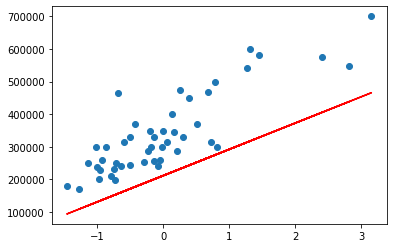

[array([213280.69060897]), array([80834.1980778]), 0.0]
[array([214552.01029862]), array([81177.94065038]), 0.0]
[array([215810.61679138]), array([81516.32095157]), 0.0]
[array([217056.63721921]), array([81849.42263103]), 0.0]
[array([218290.19744276]), array([82177.32803353]), 0.0]
[array([219511.42206408]), array([82500.11821929]), 0.0]


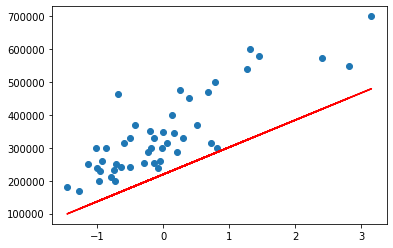

[array([220720.43443918]), array([82817.87298402]), 0.0]
[array([221917.35669054]), array([83130.67087862]), 0.0]
[array([223102.30971938]), array([83438.58922866]), 0.0]
[array([224275.41321793]), array([83741.70415342]), 0.0]
[array([225436.78568149]), array([84040.09058476]), 0.0]
[array([226586.54442042]), array([84333.82228562]), 0.0]


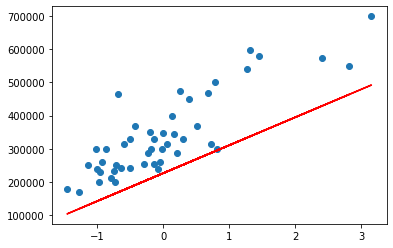

[array([227724.80557196]), array([84622.97186829]), 0.0]
[array([228851.68411199]), array([84907.6108123]), 0.0]
[array([229967.29386661]), array([85187.80948213]), 0.0]
[array([231071.74752369]), array([85463.6371446]), 0.0]
[array([232165.1566442]), array([85735.16198599]), 0.0]
[array([233247.6316735]), array([86002.45112891]), 0.0]


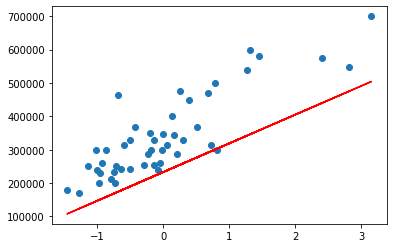

[array([234319.28195251]), array([86265.57064886]), 0.0]
[array([235380.21572873]), array([86524.58559059]), 0.0]
[array([236430.54016719]), array([86779.55998418]), 0.0]
[array([237470.36136126]), array([87030.55686084]), 0.0]
[array([238499.78434339]), array([87277.63826855]), 0.0]
[array([239518.9130957]), array([87520.86528732]), 0.0]


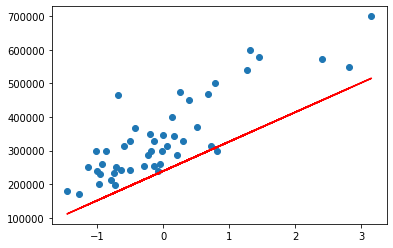

[array([240527.85056049]), array([87760.29804438]), 0.0]
[array([241526.69865063]), array([87995.99572894]), 0.0]
[array([242515.55825987]), array([88228.01660693]), 0.0]
[array([243494.52927301]), array([88456.41803531]), 0.0]
[array([244463.71057603]), array([88681.25647631]), 0.0]
[array([245423.20006601]), array([88902.58751137]), 0.0]


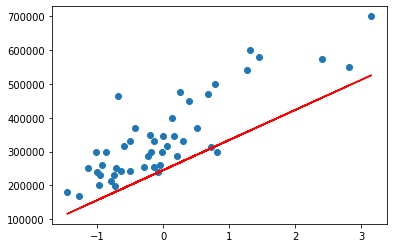

[array([246373.0946611]), array([89120.46585488]), 0.0]
[array([247313.49031023]), array([89334.94536767]), 0.0]
[array([248244.48200287]), array([89546.07907041]), 0.0]
[array([249166.16377859]), array([89753.91915663]), 0.0]
[array([250078.62873655]), array([89958.51700567]), 0.0]
[array([250981.96904493]), array([90159.92319536]), 0.0]


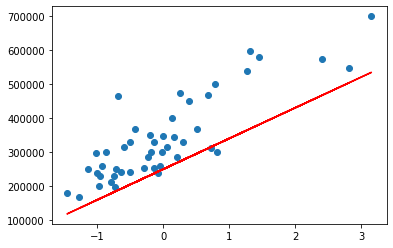

[array([251876.27595022]), array([90358.18751454]), 0.0]
[array([252761.63978647]), array([90553.35897536]), 0.0]
[array([253638.14998435]), array([90745.48582541]), 0.0]
[array([254505.89508025]), array([90934.6155596]), 0.0]
[array([255364.96272519]), array([91120.79493197]), 0.0]
[array([256215.43969368]), array([91304.06996719]), 0.0]


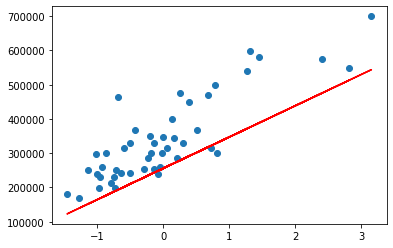

[array([257057.41189249]), array([91484.48597196]), 0.0]
[array([257890.96436931]), array([91662.08754623]), 0.0]
[array([258716.18132136]), array([91836.91859418]), 0.0]
[array([259533.14610389]), array([92009.02233512]), 0.0]
[array([260341.9412386]), array([92178.44131415]), 0.0]
[array([261142.64842196]), array([92345.21741267]), 0.0]


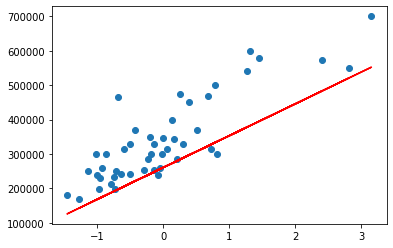

[array([261935.34853348]), array([92509.39185874]), 0.0]
[array([262720.12164389]), array([92671.0052373]), 0.0]
[array([263497.0470232]), array([92830.09750016]), 0.0]
[array([264266.20314871]), array([92986.70797588]), 0.0]
[array([265027.66771297]), array([93140.87537955]), 0.0]
[array([265781.51763158]), array([93292.63782229]), 0.0]


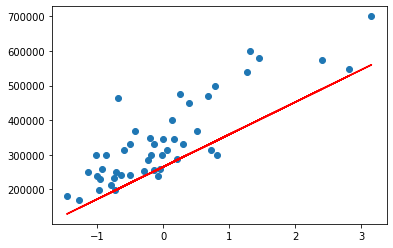

[array([266527.82905101]), array([93442.03282068]), 0.0]
[array([267266.67735625]), array([93589.0973061]), 0.0]
[array([267998.13717843]), array([93733.86763378]), 0.0]
[array([268722.28240239]), array([93876.37959182]), 0.0]
[array([269439.18617411]), array([94016.66841006]), 0.0]
[array([270148.92090811]), array([94154.76876873]), 0.0]


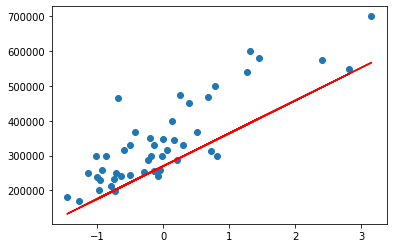

[array([270851.55829478]), array([94290.71480711]), 0.0]
[array([271547.16930757]), array([94424.54013187]), 0.0]
[array([272235.82421024]), array([94556.27782545]), 0.0]
[array([272917.59256389]), array([94685.96045422]), 0.0]
[array([273592.54323399]), array([94813.62007651]), 0.0]
[array([274260.7443974]), array([94939.28825056]), 0.0]


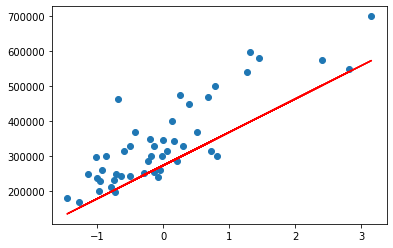

[array([274922.26354917]), array([95062.9960423]), 0.0]
[array([275577.16750942]), array([95184.77403307]), 0.0]
[array([276225.52243007]), array([95304.65232712]), 0.0]
[array([276867.39380151]), array([95422.66055909]), 0.0]
[array([277502.84645924]), array([95538.82790135]), 0.0]
[array([278131.9445904]), array([95653.18307117]), 0.0]


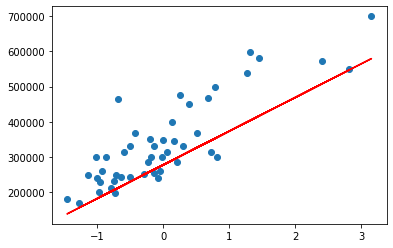

[array([278754.75174024]), array([95765.75433784]), 0.0]
[array([279371.33081858]), array([95876.56952967]), 0.0]
[array([279981.74410614]), array([95985.65604085]), 0.0]
[array([280586.05326082]), array([96093.04083823]), 0.0]
[array([281184.31932396]), array([96198.75046799]), 0.0]
[array([281776.60272646]), array([96302.81106219]), 0.0]


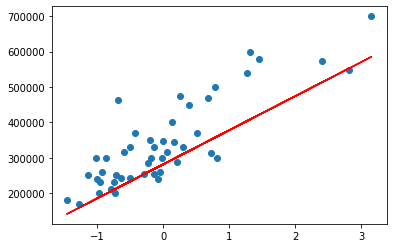

[array([282362.96329494]), array([96405.24834526]), 0.0]
[array([282943.46025774]), array([96506.0876403]), 0.0]
[array([283518.15225091]), array([96605.3538754]), 0.0]
[array([284087.09732414]), array([96703.0715898]), 0.0]
[array([284650.35294664]), array([96799.2649399]), 0.0]
[array([285207.97601292]), array([96893.95770528]), 0.0]


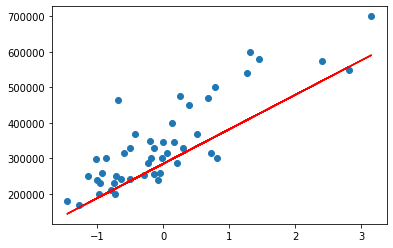

[array([285760.02284854]), array([96987.17329458]), 0.0]
[array([286306.5492158]), array([97078.93475126]), 0.0]
[array([286847.61031938]), array([97169.26475931]), 0.0]
[array([287383.26081193]), array([97258.18564885]), 0.0]
[array([287913.55479956]), array([97345.71940168]), 0.0]
[array([288438.54584731]), array([97431.88765668]), 0.0]


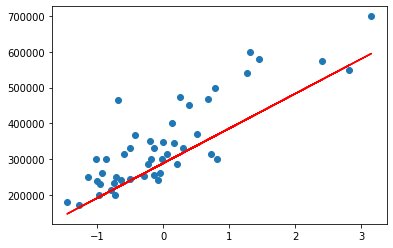

[array([288958.28698458]), array([97516.71171515]), 0.0]
[array([289472.83071048]), array([97600.21254614]), 0.0]
[array([289982.22899912]), array([97682.41079154]), 0.0]
[array([290486.53330487]), array([97763.32677127]), 0.0]
[array([290985.79456757]), array([97842.98048826]), 0.0]
[array([291480.06321764]), array([97921.39163338]), 0.0]


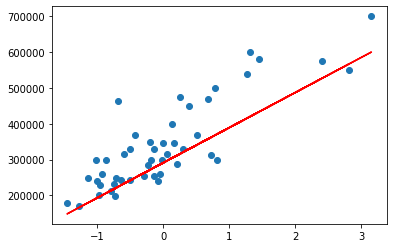

[array([291969.38918121]), array([97998.57959035]), 0.0]
[array([292453.82188514]), array([98074.56344052]), 0.0]
[array([292933.41026203]), array([98149.36196753]), 0.0]
[array([293408.20275516]), array([98222.99366206]), 0.0]
[array([293878.24732335]), array([98295.4767263]), 0.0]
[array([294343.59144586]), array([98366.82907851]), 0.0]


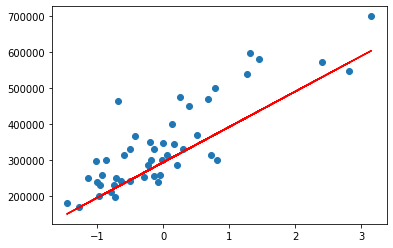

[array([294804.28212715]), array([98437.06835742]), 0.0]
[array([295260.36590162]), array([98506.21192662]), 0.0]
[array([295711.88883835]), array([98574.27687882]), 0.0]
[array([296158.89654571]), array([98641.28004008]), 0.0]
[array([296601.434176]), array([98707.23797401]), 0.0]
[array([297039.54642998]), array([98772.16698579]), 0.0]


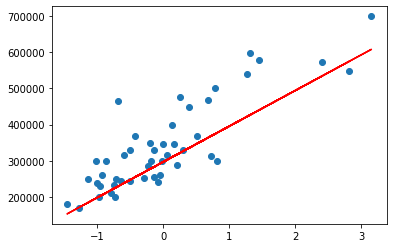

[array([297473.27756143]), array([98836.08312629]), 0.0]
[array([297902.67138156]), array([98899.00219595]), 0.0]
[array([298327.77126349]), array([98960.93974876]), 0.0]
[array([298748.6201466]), array([99021.91109606]), 0.0]
[array([299165.26054088]), array([99081.93131034]), 0.0]
[array([299577.73453121]), array([99141.01522897]), 0.0]


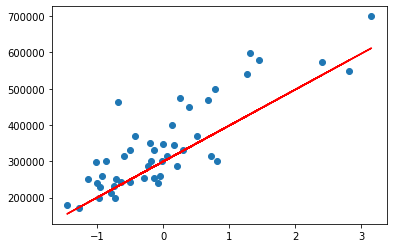

[array([299986.08378164]), array([99199.17745783]), 0.0]
[array([300390.34953957]), array([99256.43237501]), 0.0]
[array([300790.57263992]), array([99312.79413425]), 0.0]
[array([301186.79350927]), array([99368.27666853]), 0.0]
[array([301579.05216992]), array([99422.89369347]), 0.0]
[array([301967.38824396]), array([99476.65871073]), 0.0]


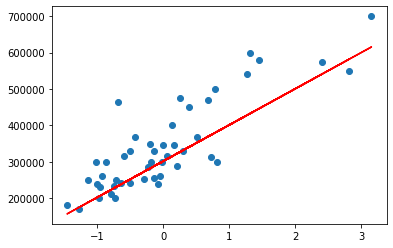

[array([302351.84095727]), array([99529.58501136]), 0.0]
[array([302732.44914344]), array([99581.68567906]), 0.0]
[array([303109.25124775]), array([99632.97359343]), 0.0]
[array([303482.28533102]), array([99683.46143315]), 0.0]
[array([303851.58907345]), array([99733.16167913]), 0.0]
[array([304217.19977846]), array([99782.08661757]), 0.0]


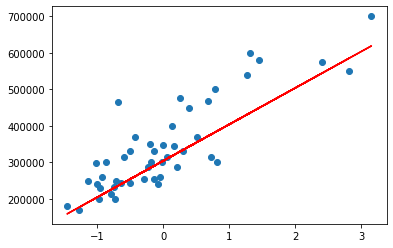

[array([304579.15437642]), array([99830.24834302]), 0.0]
[array([304937.4894284]), array([99877.65876135]), 0.0]
[array([305292.24112986]), array([99924.3295927]), 0.0]
[array([305643.44531431]), array([99970.27237438]), 0.0]
[array([305991.13745691]), array([100015.49846374]), 0.0]
[array([306335.35267809]), array([100060.01904094]), 0.0]


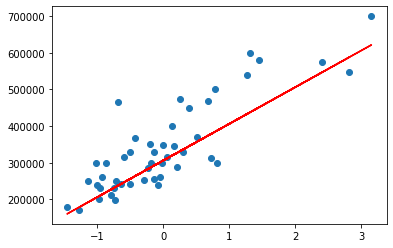

[array([306676.12574705]), array([100103.84511174]), 0.0]
[array([307013.49108533]), array([100146.9875102]), 0.0]
[array([307347.48277022]), array([100189.45690139]), 0.0]
[array([307678.13453826]), array([100231.26378402]), 0.0]
[array([308005.47978862]), array([100272.41849298]), 0.0]
[array([308329.55158648]), array([100312.93120198]), 0.0]


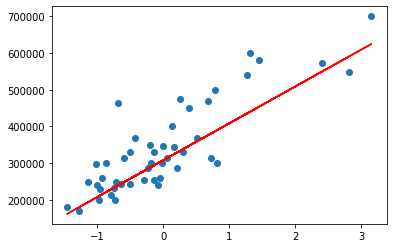

[array([308650.38266636]), array([100352.811926]), 0.0]
[array([308968.00543544]), array([100392.07052381]), 0.0]
[array([309282.45197683]), array([100430.71670037]), 0.0]
[array([309593.75405281]), array([100468.76000925]), 0.0]
[array([309901.94310802]), array([100506.20985499]), 0.0]
[array([310207.05027269]), array([100543.07549542]), 0.0]


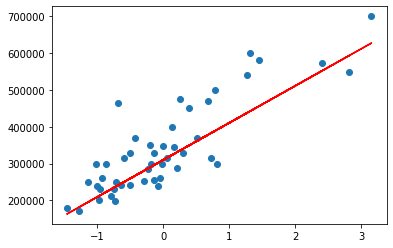

[array([310509.10636571]), array([100579.36604394]), 0.0]
[array([310808.14189779]), array([100615.09047181]), 0.0]
[array([311104.18707456]), array([100650.25761033]), 0.0]
[array([311397.27179956]), array([100684.87615301]), 0.0]
[array([311687.42567731]), array([100718.95465778]), 0.0]
[array([311974.67801628]), array([100752.50154906]), 0.0]


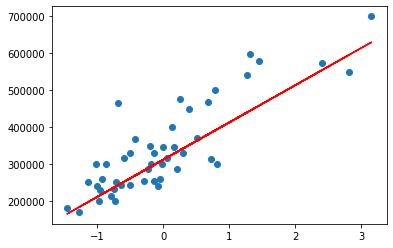

[array([312259.05783186]), array([100785.52511983]), 0.0]
[array([312540.59384929]), array([100818.03353373]), 0.0]
[array([312819.31450654]), array([100850.03482703]), 0.0]
[array([313095.24795722]), array([100881.53691065]), 0.0]
[array([313368.42207339]), array([100912.5475721]), 0.0]
[array([313638.8644484]), array([100943.0744774]), 0.0]


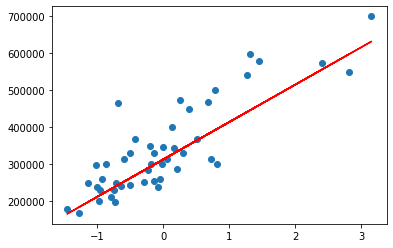

[array([313906.60239966]), array([100973.12517299]), 0.0]
[array([314171.66297141]), array([101002.70708758]), 0.0]
[array([314434.07293744]), array([101031.82753401]), 0.0]
[array([314693.85880381]), array([101060.49371102]), 0.0]
[array([314951.04681152]), array([101088.71270508]), 0.0]
[array([315205.66293915]), array([101116.49149208]), 0.0]


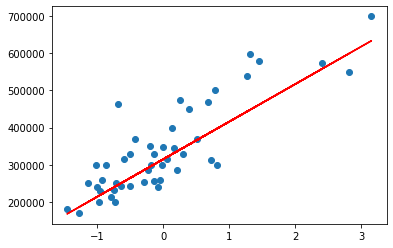

[array([315457.7329055]), array([101143.83693911]), 0.0]
[array([315707.28217219]), array([101170.75580614]), 0.0]
[array([315954.33594621]), array([101197.25474767]), 0.0]
[array([316198.9191825]), array([101223.3403144]), 0.0]
[array([316441.05658642]), array([101249.01895485]), 0.0]
[array([316680.7726163]), array([101274.29701693]), 0.0]


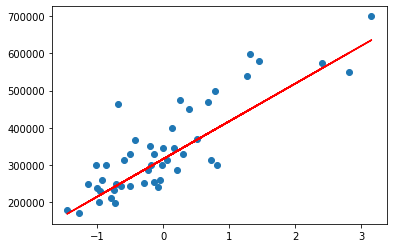

[array([316918.09148588]), array([101299.18074952]), 0.0]
[array([317153.03716676]), array([101323.67630406]), 0.0]
[array([317385.63339084]), array([101347.78973597]), 0.0]
[array([317615.90365268]), array([101371.52700626]), 0.0]
[array([317843.8712119]), array([101394.89398291]), 0.0]
[array([318069.55909552]), array([101417.89644239]), 0.0]


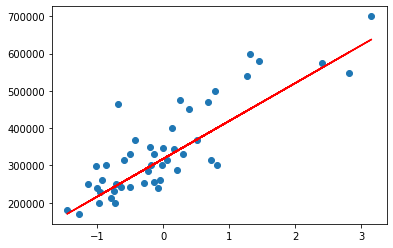

[array([318292.99010031]), array([101440.54007104]), 0.0]
[array([318514.18679505]), array([101462.83046652]), 0.0]
[array([318733.17152285]), array([101484.77313914]), 0.0]
[array([318949.96640336]), array([101506.37351326]), 0.0]
[array([319164.59333507]), array([101527.63692862]), 0.0]
[array([319377.07399747]), array([101548.56864169]), 0.0]


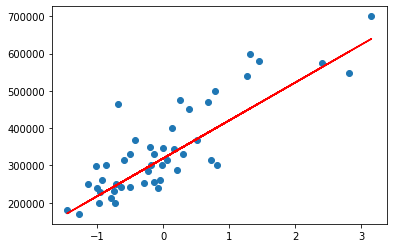

[array([319587.42985324]), array([101569.17382689]), 0.0]
[array([319795.68215045]), array([101589.45757796]), 0.0]
[array([320001.85192469]), array([101609.42490916]), 0.0]
[array([320205.96000119]), array([101629.08075655]), 0.0]
[array([320408.02699692]), array([101648.42997917]), 0.0]
[array([320608.0733227]), array([101667.47736025]), 0.0]


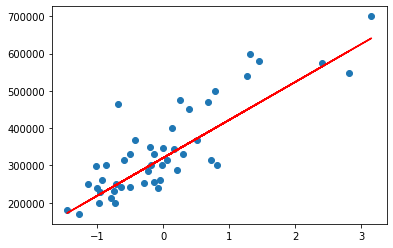

[array([320806.11918521]), array([101686.22760844]), 0.0]
[array([321002.18458911]), array([101704.68535891]), 0.0]
[array([321196.28933896]), array([101722.85517452]), 0.0]
[array([321388.45304131]), array([101740.74154697]), 0.0]
[array([321578.69510665]), array([101758.34889788]), 0.0]
[array([321767.03475132]), array([101775.68157988]), 0.0]


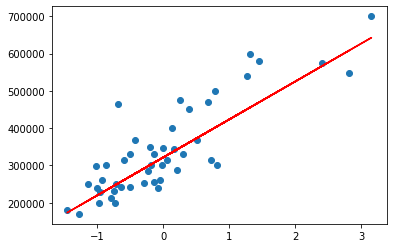

[array([321953.49099956]), array([101792.74387773]), 0.0]
[array([322138.08268531]), array([101809.54000933]), 0.0]
[array([322320.8284542]), array([101826.07412678]), 0.0]
[array([322501.7467654]), array([101842.35031743]), 0.0]
[array([322680.85589349]), array([101858.37260484]), 0.0]
[array([322858.1739303]), array([101874.14494981]), 0.0]


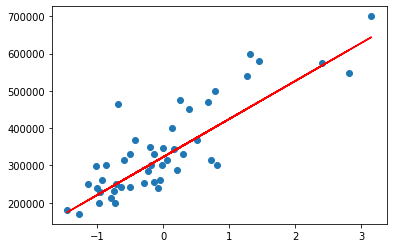

[array([323033.71878674]), array([101889.67125138]), 0.0]
[array([323207.50819462]), array([101904.95534774]), 0.0]
[array([323379.55970842]), array([101920.00101721]), 0.0]
[array([323549.89070708]), array([101934.81197917]), 0.0]
[array([323718.51839575]), array([101949.39189498]), 0.0]
[array([323885.45980754]), array([101963.74436888]), 0.0]


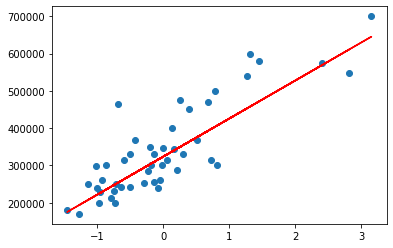

[array([324050.73180521]), array([101977.8729489]), 0.0]
[array([324214.3510829]), array([101991.7811277]), 0.0]
[array([324376.33416782]), array([102005.47234347]), 0.0]
[array([324536.69742188]), array([102018.94998077]), 0.0]
[array([324695.45704341]), array([102032.21737135]), 0.0]
[array([324852.62906872]), array([102045.27779499]), 0.0]


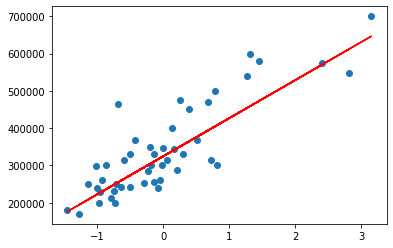

[array([325008.22937378]), array([102058.1344803]), 0.0]
[array([325162.27367578]), array([102070.79060553]), 0.0]
[array([325314.77753477]), array([102083.24929936]), 0.0]
[array([325465.75635517]), array([102095.51364166]), 0.0]
[array([325615.22538736]), array([102107.58666423]), 0.0]
[array([325763.19972923]), array([102119.47135162]), 0.0]


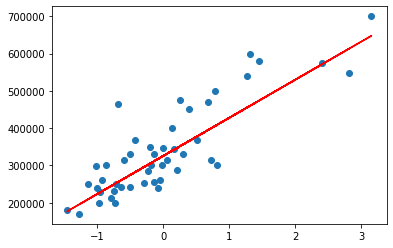

[array([325909.69432768]), array([102131.17064178]), 0.0]
[array([326054.72398015]), array([102142.68742685]), 0.0]
[array([326198.3033361]), array([102154.02455384]), 0.0]
[array([326340.44689848]), array([102165.18482538]), 0.0]
[array([326481.16902524]), array([102176.17100034]), 0.0]
[array([326620.48393073]), array([102186.98579457]), 0.0]


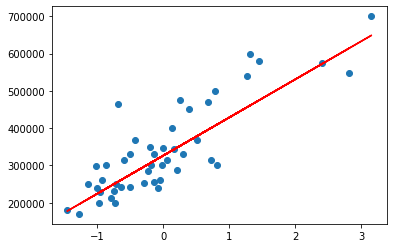

[array([326758.40568717]), array([102197.63188156]), 0.0]
[array([326894.94822604]), array([102208.11189309]), 0.0]
[array([327030.12533953]), array([102218.42841987]), 0.0]
[array([327163.95068188]), array([102228.58401222]), 0.0]
[array([327296.4377708]), array([102238.58118066]), 0.0]
[array([327427.59998884]), array([102248.42239654]), 0.0]


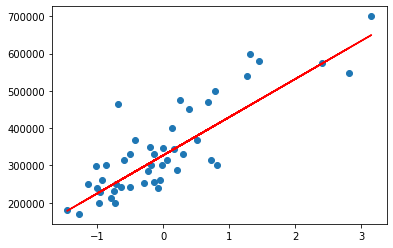

[array([327557.45058469]), array([102258.11009269]), 0.0]
[array([327686.00267459]), array([102267.64666396]), 0.0]
[array([327813.26924359]), array([102277.03446784]), 0.0]
[array([327939.2631469]), array([102286.27582506]), 0.0]
[array([328063.99711117]), array([102295.37302014]), 0.0]
[array([328187.48373581]), array([102304.32830195]), 0.0]


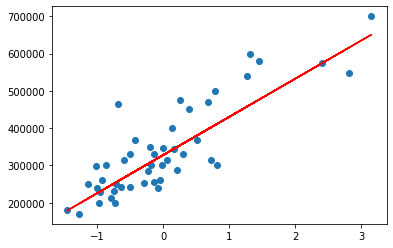

[array([328309.73549419]), array([102313.14388431]), 0.0]
[array([328430.764735]), array([102321.82194648]), 0.0]
[array([328550.58368339]), array([102330.36463372]), 0.0]
[array([328669.2044423]), array([102338.77405784]), 0.0]
[array([328786.63899362]), array([102347.0522977]), 0.0]
[array([328902.89919943]), array([102355.20139974]), 0.0]


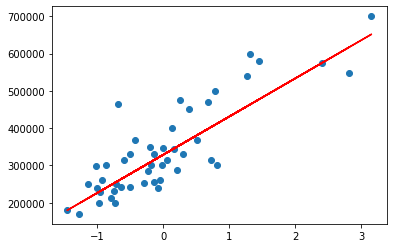

[array([329017.99680318]), array([102363.22337846]), 0.0]
[array([329131.9434309]), array([102371.12021694]), 0.0]
[array([329244.75059233]), array([102378.89386732]), 0.0]
[array([329356.42968215]), array([102386.54625132]), 0.0]
[array([329466.99198108]), array([102394.07926063]), 0.0]
[array([329576.44865701]), array([102401.49475747]), 0.0]


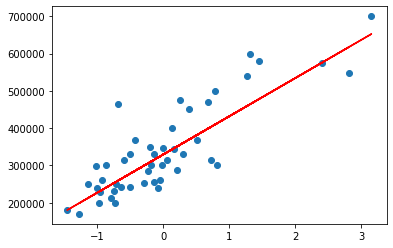

[array([329684.81076618]), array([102408.79457499]), 0.0]
[array([329792.08925427]), array([102415.98051775]), 0.0]
[array([329898.29495747]), array([102423.05436215]), 0.0]
[array([330003.43860364]), array([102430.01785691]), 0.0]
[array([330107.53081335]), array([102436.87272343]), 0.0]
[array([330210.58210096]), array([102443.62065628]), 0.0]


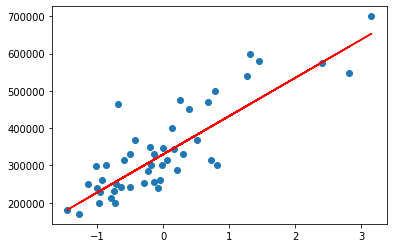

[array([330312.60287569]), array([102450.2633236]), 0.0]
[array([330413.60344268]), array([102456.80236748]), 0.0]
[array([330513.594004]), array([102463.23940442]), 0.0]
[array([330612.5846597]), array([102469.5760257]), 0.0]
[array([330710.58540885]), array([102475.81379776]), 0.0]
[array([330807.60615051]), array([102481.95426262]), 0.0]


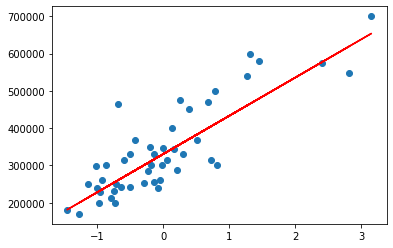

[array([330903.65668475]), array([102487.99893825]), 0.0]
[array([330998.74671364]), array([102493.94931891]), 0.0]
[array([331092.88584225]), array([102499.8068756]), 0.0]
[array([331186.08357958]), array([102505.57305631]), 0.0]
[array([331278.34933952]), array([102511.2492865]), 0.0]
[array([331369.69244187]), array([102516.83696936]), 0.0]


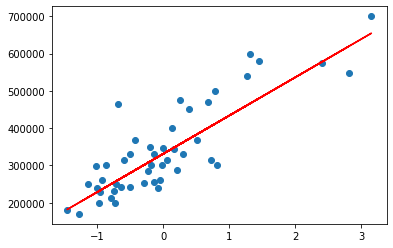

[array([331460.1221132]), array([102522.3374862]), 0.0]
[array([331549.64748781]), array([102527.75219679]), 0.0]
[array([331638.27760868]), array([102533.08243966]), 0.0]
[array([331726.02142834]), array([102538.32953249]), 0.0]
[array([331812.8878098]), array([102543.49477239]), 0.0]
[array([331898.88552744]), array([102548.57943625]), 0.0]


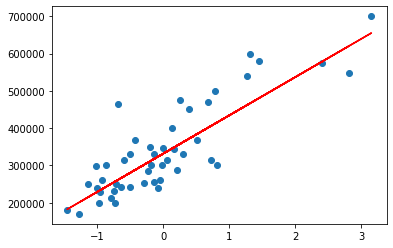

[array([331984.02326792]), array([102553.58478102]), 0.0]
[array([332068.30963098]), array([102558.51204405]), 0.0]
[array([332151.75313042]), array([102563.36244339]), 0.0]
[array([332234.36219486]), array([102568.13717809]), 0.0]
[array([332316.14516865]), array([102572.8374285]), 0.0]
[array([332397.11031271]), array([102577.46435655]), 0.0]


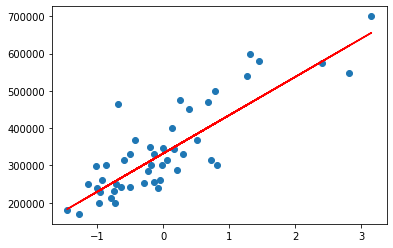

[array([332477.26580533]), array([102582.01910603]), 0.0]
[array([332556.61974302]), array([102586.50280292]), 0.0]
[array([332635.18014133]), array([102590.9165556]), 0.0]
[array([332712.95493567]), array([102595.26145519]), 0.0]
[array([332789.95198205]), array([102599.53857577]), 0.0]
[array([332866.17905798]), array([102603.74897467]), 0.0]


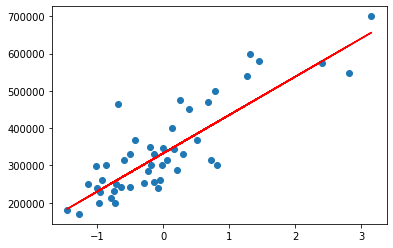

[array([332941.64386314]), array([102607.89369273]), 0.0]
[array([333016.35402026]), array([102611.97375455]), 0.0]
[array([333090.3170758]), array([102615.99016875]), 0.0]
[array([333163.54050078]), array([102619.94392819]), 0.0]
[array([333236.03169152]), array([102623.83601029]), 0.0]
[array([333307.79797035]), array([102627.66737718]), 0.0]


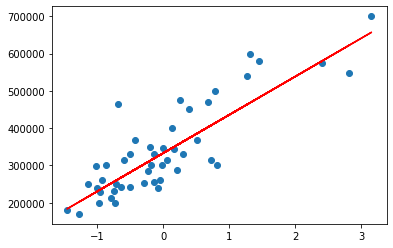

[array([333378.84658639]), array([102631.43897601]), 0.0]
[array([333449.18471627]), array([102635.15173913]), 0.0]
[array([333518.81946485]), array([102638.80658437]), 0.0]
[array([333587.75786595]), array([102642.40441521]), 0.0]
[array([333656.00688304]), array([102645.94612108]), 0.0]
[array([333723.57340995]), array([102649.43257749]), 0.0]


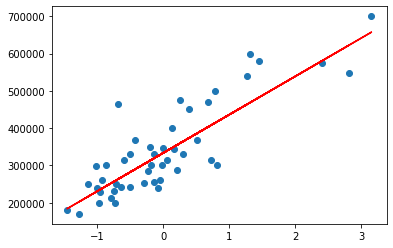

[array([333790.4642716]), array([102652.86464633]), 0.0]
[array([333856.68622462]), array([102656.24317602]), 0.0]
[array([333922.24595812]), array([102659.56900176]), 0.0]
[array([333987.15009429]), array([102662.8429457]), 0.0]
[array([334051.40518909]), array([102666.0658172]), 0.0]
[array([334115.01773294]), array([102669.23841295]), 0.0]


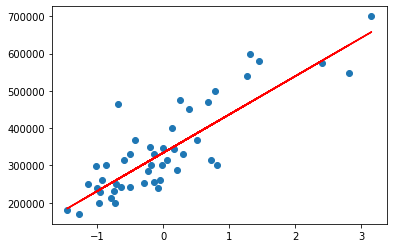

[array([334177.99415136]), array([102672.36151725]), 0.0]
[array([334240.34080559]), array([102675.43590215]), 0.0]
[array([334302.06399328]), array([102678.46232765]), 0.0]
[array([334363.16994909]), array([102681.44154191]), 0.0]
[array([334423.66484534]), array([102684.3742814]), 0.0]
[array([334483.55479263]), array([102687.26127112]), 0.0]


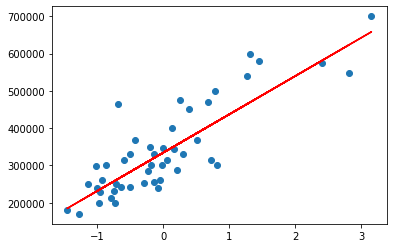

[array([334542.84584045]), array([102690.10322475]), 0.0]
[array([334601.54397779]), array([102692.90084483]), 0.0]
[array([334659.65513376]), array([102695.65482295]), 0.0]
[array([334717.18517817]), array([102698.36583992]), 0.0]
[array([334774.13992213]), array([102701.03456591]), 0.0]
[array([334830.52511865]), array([102703.66166066]), 0.0]


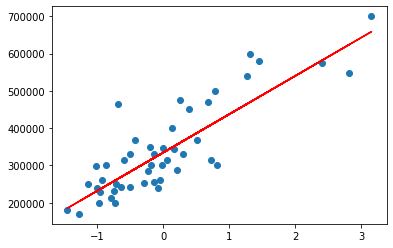

[array([334886.34646321]), array([102706.24777358]), 0.0]
[array([334941.60959432]), array([102708.793544]), 0.0]
[array([334996.32009412]), array([102711.29960123]), 0.0]
[array([335050.48348893]), array([102713.76656478]), 0.0]
[array([335104.10524978]), array([102716.19504452]), 0.0]
[array([335157.19079303]), array([102718.58564077]), 0.0]


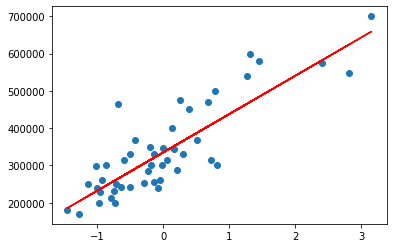

[array([335209.74548084]), array([102720.9389445]), 0.0]
[array([335261.77462178]), array([102723.25553747]), 0.0]
[array([335313.28347131]), array([102725.53599234]), 0.0]
[array([335364.27723234]), array([102727.78087287]), 0.0]
[array([335414.76105576]), array([102729.99073399]), 0.0]
[array([335464.74004095]), array([102732.16612201]), 0.0]


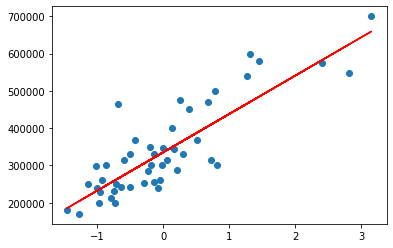

[array([335514.21923628]), array([102734.30757469]), 0.0]
[array([335563.20363966]), array([102736.41562141]), 0.0]
[array([335611.69819901]), array([102738.49078329]), 0.0]
[array([335659.70781277]), array([102740.53357332]), 0.0]
[array([335707.23733038]), array([102742.5444965]), 0.0]
[array([335754.29155283]), array([102744.52404994]), 0.0]


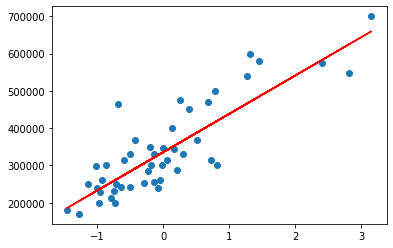

[array([335800.87523304]), array([102746.472723]), 0.0]
[array([335846.99307646]), array([102748.39099739]), 0.0]
[array([335892.64974144]), array([102750.27934733]), 0.0]
[array([335937.84983977]), array([102752.13823964]), 0.0]
[array([335982.59793711]), array([102753.96813383]), 0.0]
[array([336026.89855349]), array([102755.76948227]), 0.0]


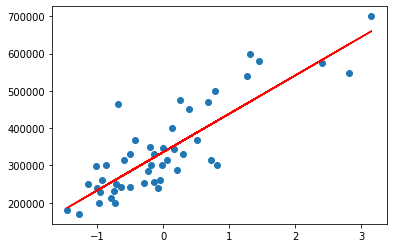

[array([336070.7561637]), array([102757.54273027]), 0.0]
[array([336114.1751978]), array([102759.28831618]), 0.0]
[array([336157.16004157]), array([102761.00667153]), 0.0]
[array([336199.7150369]), array([102762.69822109]), 0.0]
[array([336241.84448228]), array([102764.36338304]), 0.0]
[array([336283.5526332]), array([102766.002569]), 0.0]


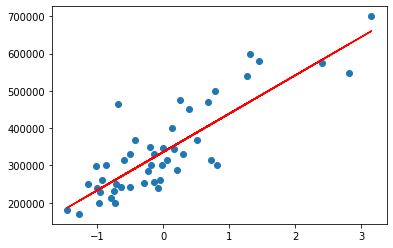

[array([336324.84370261]), array([102767.6161842]), 0.0]
[array([336365.72186133]), array([102769.20462754]), 0.0]
[array([336406.19123846]), array([102770.76829168]), 0.0]
[array([336446.25592182]), array([102772.30756317]), 0.0]
[array([336485.91995835]), array([102773.82282253]), 0.0]
[array([336525.18735451]), array([102775.31444434]), 0.0]


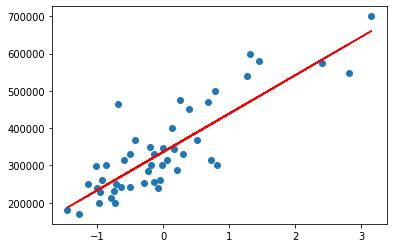

[array([336564.06207671]), array([102776.78279734]), 0.0]
[array([336602.54805169]), array([102778.22824451]), 0.0]
[array([336640.64916691]), array([102779.65114319]), 0.0]
[array([336678.36927099]), array([102781.05184511]), 0.0]
[array([336715.71217402]), array([102782.43069654]), 0.0]
[array([336752.68164803]), array([102783.78803834]), 0.0]


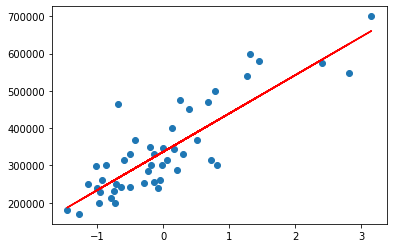

[array([336789.28142729]), array([102785.12420605]), 0.0]
[array([336825.51520876]), array([102786.43952998]), 0.0]
[array([336861.38665242]), array([102787.7343353]), 0.0]
[array([336896.89938164]), array([102789.00894207]), 0.0]
[array([336932.05698357]), array([102790.2636654]), 0.0]
[array([336966.86300948]), array([102791.49881545]), 0.0]


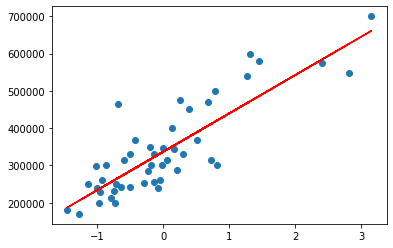

[array([337001.32097513]), array([102792.71469757]), 0.0]
[array([337035.43436112]), array([102793.91161233]), 0.0]
[array([337069.20661326]), array([102795.08985561]), 0.0]
[array([337102.64114287]), array([102796.24971867]), 0.0]
[array([337135.74132718]), array([102797.39148826]), 0.0]
[array([337168.51050966]), array([102798.51544662]), 0.0]


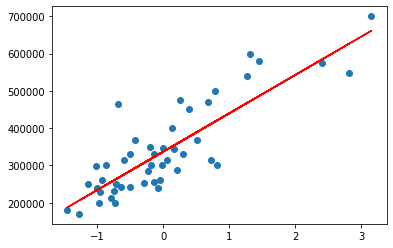

[array([337200.9520003]), array([102799.62187159]), 0.0]
[array([337233.06907605]), array([102800.7110367]), 0.0]
[array([337264.86498103]), array([102801.78321119]), 0.0]
[array([337296.34292697]), array([102802.8386601]), 0.0]
[array([337327.50609344]), array([102803.87764436]), 0.0]
[array([337358.35762825]), array([102804.90042081]), 0.0]


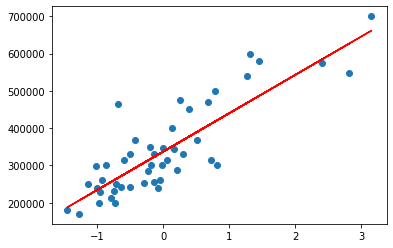

[array([337388.90064771]), array([102805.90724228]), 0.0]
[array([337419.13823698]), array([102806.89835767]), 0.0]
[array([337449.07345035]), array([102807.87401198]), 0.0]
[array([337478.7093116]), array([102808.8344464]), 0.0]
[array([337508.04881422]), array([102809.77989836]), 0.0]
[array([337537.09492183]), array([102810.71060158]), 0.0]


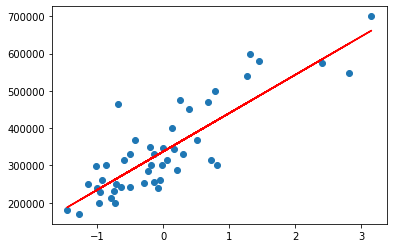

[array([337565.85056835]), array([102811.62678614]), 0.0]
[array([337594.31865841]), array([102812.52867852]), 0.0]
[array([337622.50206758]), array([102813.41650167]), 0.0]
[array([337650.40364264]), array([102814.29047507]), 0.0]
[array([337678.02620196]), array([102815.15081477]), 0.0]
[array([337705.37253569]), array([102815.99773346]), 0.0]


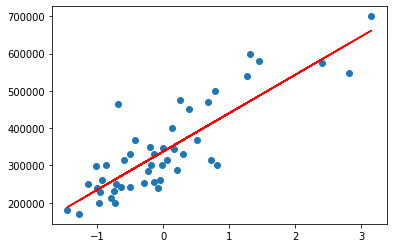

[array([337732.44540608]), array([102816.83144049]), 0.0]
[array([337759.24754776]), array([102817.65214197]), 0.0]
[array([337785.78166803]), array([102818.46004077]), 0.0]
[array([337812.05044709]), array([102819.25533661]), 0.0]
[array([337838.05653836]), array([102820.03822611]), 0.0]
[array([337863.80256873]), array([102820.80890278]), 0.0]


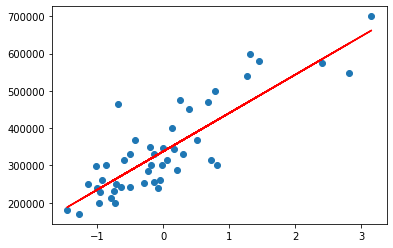

[array([337889.29113878]), array([102821.56755715]), 0.0]
[array([337914.52482314]), array([102822.31437676]), 0.0]
[array([337939.50617065]), array([102823.04954622]), 0.0]
[array([337964.23770469]), array([102823.77324729]), 0.0]
[array([337988.72192339]), array([102824.48565886]), 0.0]
[array([338012.9612999]), array([102825.18695704]), 0.0]


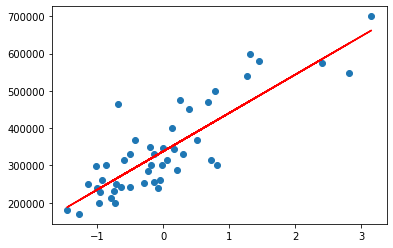

[array([338036.95828265]), array([102825.87731519]), 0.0]
[array([338060.71529556]), array([102826.55690399]), 0.0]
[array([338084.23473835]), array([102827.22589143]), 0.0]
[array([338107.51898671]), array([102827.88444288]), 0.0]
[array([338130.57039259]), array([102828.53272114]), 0.0]
[array([338153.39128441]), array([102829.17088648]), 0.0]


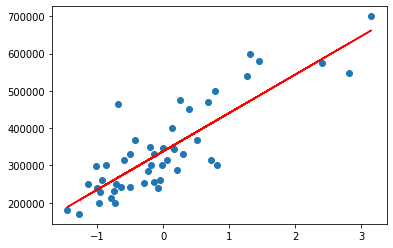

[array([338175.98396731]), array([102829.79909664]), 0.0]


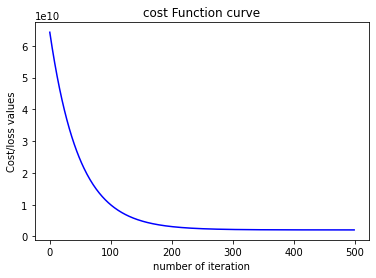

In [48]:
theta_array = training(X_norm[:,0:1],X_norm[:,1:2],Y,0.01,500)